# Лабораторная работа №1

Размер 10x10: Время выполнения = 0.0532 сек
Верификация успешна для 10x10
Размер 100x100: Время выполнения = 0.1233 сек
Верификация успешна для 100x100
Размер 200x200: Время выполнения = 0.4976 сек
Верификация успешна для 200x200
Размер 300x300: Время выполнения = 1.3466 сек
Верификация успешна для 300x300
Размер 400x400: Время выполнения = 2.7777 сек
Верификация успешна для 400x400
Размер 500x500: Время выполнения = 4.9350 сек
Верификация успешна для 500x500
Размер 600x600: Время выполнения = 7.9835 сек
Верификация успешна для 600x600
Размер 700x700: Время выполнения = 12.0852 сек
Верификация успешна для 700x700
Размер 800x800: Время выполнения = 17.7175 сек
Верификация успешна для 800x800
Размер 900x900: Время выполнения = 25.4729 сек
Верификация успешна для 900x900
Размер 1000x1000: Время выполнения = 37.5182 сек
Верификация успешна для 1000x1000


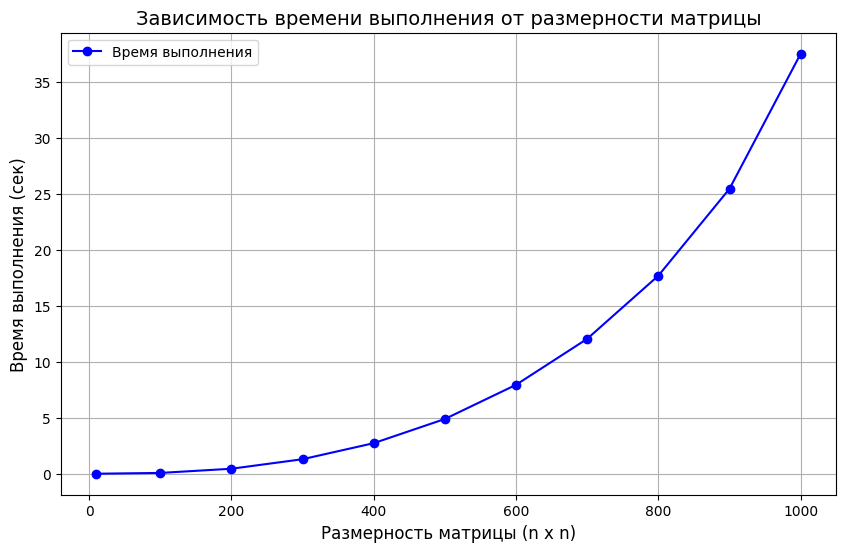

In [1]:
import subprocess
import numpy as np
import time
import matplotlib.pyplot as plt

def load_matrix(filename, size):
    """Загружает матрицу из файла"""
    return np.loadtxt(filename, dtype=int).reshape((size, size))

def verify_multiplication(A_file, B_file, C_file, size):
    """Верифицирует умножение матриц"""
    A = load_matrix(A_file, size)
    B = load_matrix(B_file, size)
    C_computed = load_matrix(C_file, size)
    
    C_expected = np.dot(A, B)
    
    if np.array_equal(C_computed, C_expected):
        print(f"Верификация успешна для {size}x{size}")
    else:
        print(f"Ошибка верификации для {size}x{size}")

def run_test(size):
    """Запускает тест умножения для матрицы указанного размера"""
    A_file = f"data/{size}/matrix_A.txt"
    B_file = f"data/{size}/matrix_B.txt"
    C_file = f"data/{size}/matrix_C.txt"

    start_time = time.time()
    subprocess.run(["matrix_mult/x64/Debug/matrix_mult.exe", str(size), A_file, B_file, C_file], check=True)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    print(f"Размер {size}x{size}: Время выполнения = {elapsed_time:.4f} сек")

    verify_multiplication(A_file, B_file, C_file, size)
    
    return size, elapsed_time

sizes = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

time_data = []

for size in sizes:
    size, elapsed_time = run_test(size)
    time_data.append((size, elapsed_time))

sizes, times = zip(*time_data)

plt.figure(figsize=(10, 6))
plt.plot(sizes, times, marker='o', linestyle='-', color='b', label='Время выполнения')
plt.xlabel("Размерность матрицы (n x n)", fontsize=12)
plt.ylabel("Время выполнения (сек)", fontsize=12)
plt.title("Зависимость времени выполнения от размерности матрицы", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()